<h1>Выполенение задания №1</h1>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib

<b1> №1 Построить матрицу c количеством строк 10 и столбцов 2, переменные
 заполняются случайными числами с равномерным распределением.
 Полученные сгенерированные случайные числа представить на графике в
 виде точек </b1>

In [2]:
matrix = np.random.uniform(0, 1, (10, 2))
matrix

array([[0.73877103, 0.95162147],
       [0.97486447, 0.44506492],
       [0.3214031 , 0.93860584],
       [0.02649583, 0.23286686],
       [0.63356489, 0.21989306],
       [0.92185546, 0.89840512],
       [0.37644781, 0.57824454],
       [0.65349602, 0.30300308],
       [0.82970218, 0.8645779 ],
       [0.58987183, 0.02244344]])

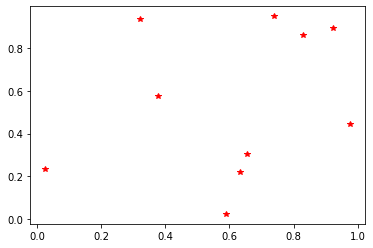

In [3]:
plt.plot(matrix[:, 0], matrix[:, 1], 'r*')
plt.show()

<b1> №2 Сгенерировать 1000 случайных чисел с любым известным распределением
и построить их гистограмму, математическое ожидание, дисперсию. </b1>

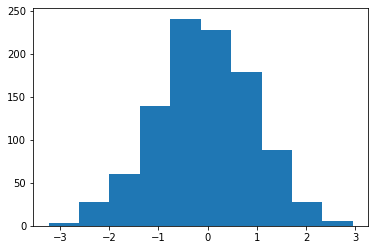

In [4]:
dots = np.random.randn(1000)
plt.hist(dots)
plt.show()

In [5]:
f'std: {np.var(dots)}   mean: {np.mean(dots)}'

# Как видим все верно, т.к. randn дает нам выборку в нормальным распределением, где дисперсия = 1, а среднее = 0

'std: 0.9599806843791228   mean: -0.04477727971390745'

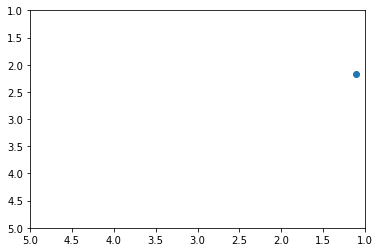

In [6]:
a = 5
plt.xlim(a)
plt.ylim(a)
plt.scatter(np.random.uniform(1, a, 1), np.random.uniform(1, a, 1))
plt.show()

<h1>Выполенение задания №2</h1>

### Part 1

In [7]:
exp100 = np.random.exponential(1, 100)
exp1000 = np.random.exponential(1, 1000)
norm100 = np.random.normal(0, 1, 100)
norm1000 = np.random.normal(0, 1, 1000)

In [8]:
print(f'Quantile 50% for exp100: {np.median(exp100)} \nQuantile 50% for exp1000: {np.median(exp1000)} \
  \nQuantile 50% for norm100: {np.median(norm100)} \nQuantile 50% for norm1000 {np.median(norm1000)}')

Quantile 50% for exp100: 0.7128762009125027 
Quantile 50% for exp1000: 0.6533897234926409   
Quantile 50% for norm100: -0.08912058610492052 
Quantile 50% for norm1000 -0.03588597211987388


In [9]:
print(f'Quantile 99% for exp100: {np.quantile(exp100, 0.99)} \nQuantile 99% for exp1000: {np.quantile(exp1000, 0.99)} \
  \nQuantile 99% for norm100: {np.quantile(norm100, 0.99)} \nQuantile 99% for norm1000 {np.quantile(norm1000, 0.99)}')

Quantile 99% for exp100: 4.760937568729148 
Quantile 99% for exp1000: 4.327717079632925   
Quantile 99% for norm100: 2.0984655541182033 
Quantile 99% for norm1000 2.2640524610008597


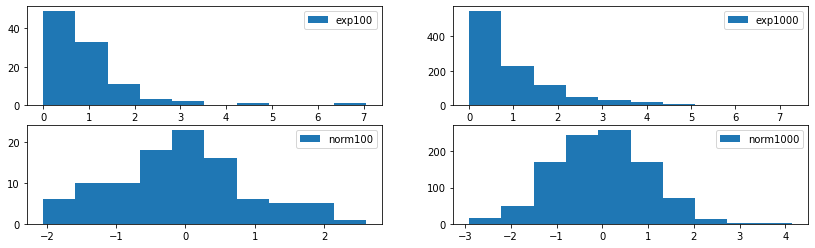

In [10]:
dist = [(exp100, 'exp100'), (exp1000, 'exp1000'), (norm100, 'norm100'), (norm1000, 'norm1000')]
plt.figure(figsize=(14, 4))
for i, d in enumerate(dist):
    plt.subplot(2, 2, i + 1)
    plt.hist(d[0], label=d[1])
    plt.legend()
plt.show()

In [11]:
def theor_func(lambd, x):
    return 1 - np.exp(-lambd * x)

In [12]:
x = np.linspace(0, 10, 1000)
y = theor_func(1, x)
x_exp100 = np.sort(exp100)
x_exp1000 = np.sort(exp1000)
y_exp100 = np.arange(0, 1, 1 / x_exp100.size)
y_exp1000 = np.arange(0, 1, 1 / x_exp1000.size)

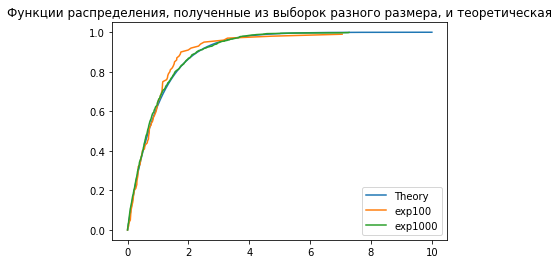

In [13]:
plt.plot(x, y, label='Theory')
plt.plot(x_exp100, y_exp100, label='exp100')
plt.plot(x_exp1000, y_exp1000, label='exp1000')
plt.legend()
plt.title('Функции распределения, полученные из выборок разного размера, и теоретическая')
plt.show()

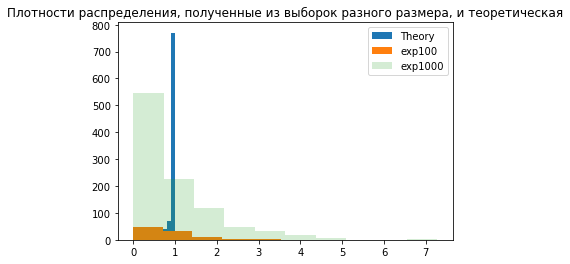

In [14]:
plt.hist(y, label='Theory')
plt.hist(x_exp100, label='exp100')
plt.hist(x_exp1000, label='exp1000', alpha=0.2)
plt.legend()
plt.title('Плотности распределения, полученные из выборок разного размера, и теоретическая')
plt.show()

### Part 2

In [15]:
def dist(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [16]:
def distance_line(n):
    dists = []
    for i in range(n):
        x1, y1 = np.random.uniform(0, 10), np.random.uniform(0, 30)
        x2, y2 = np.random.uniform(0, 10), np.random.uniform(0, 30)
        
        dists.append(dist(x1, x2, y1, y2))
        
    return dists

In [17]:
for n in [100, 1000, 10000]:
    print(np.average(distance_line(n)))

11.319649690044498
11.324648350735956
11.249312944194463


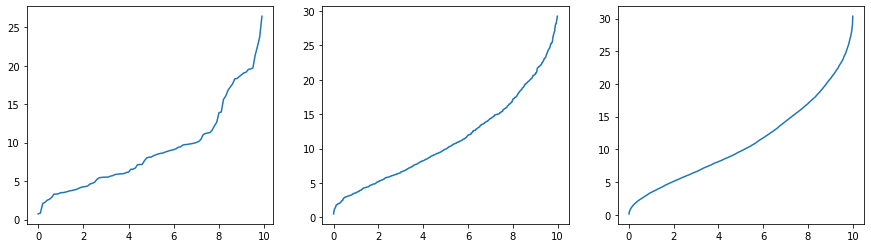

In [18]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(np.arange(0, 10, 0.1), np.sort(distance_line(100)))

plt.subplot(1, 3, 2)
plt.plot(np.arange(0, 10, 0.01), np.sort(distance_line(1000)))

plt.subplot(1, 3, 3)
plt.plot(np.arange(0, 10, 0.001), np.sort(distance_line(10000)))

plt.show()

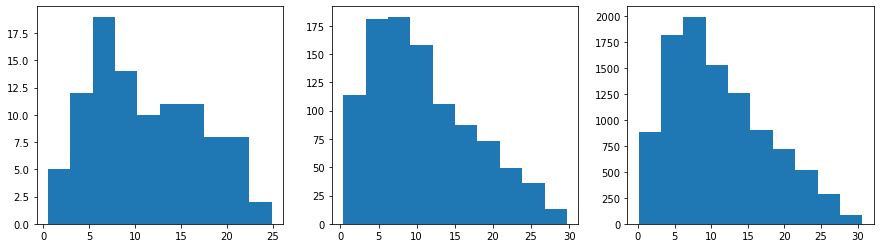

In [19]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(np.sort(distance_line(100)))

plt.subplot(1, 3, 2)
plt.hist(np.sort(distance_line(1000)))

plt.subplot(1, 3, 3)
plt.hist(np.sort(distance_line(10000)))

plt.show()

#### Покажем на одном графике 

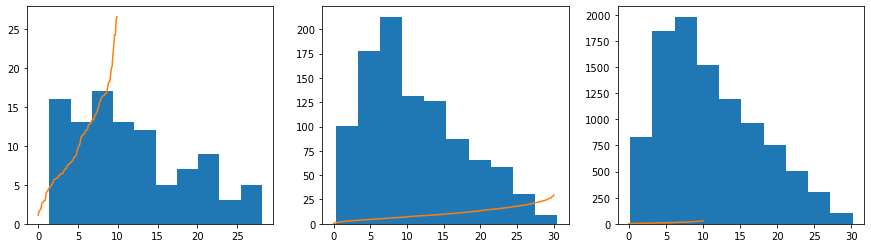

In [20]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(np.sort(distance_line(100)), bins=10)
plt.plot(np.arange(0, 10, 0.1), np.sort(distance_line(100)))

plt.subplot(1, 3, 2)
plt.hist(np.sort(distance_line(1000)))
plt.plot(np.linspace(0, 30, 1000), np.sort(distance_line(1000)))

plt.subplot(1, 3, 3)
plt.hist(np.sort(distance_line(10000)))
plt.plot(np.arange(0, 10, 0.001), np.sort(distance_line(10000)))

plt.show()

### Что-то не вышло. Попробуем displot'ом из библиотеки seaborn

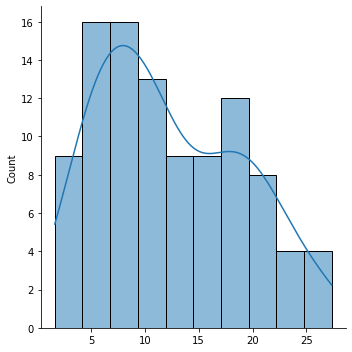

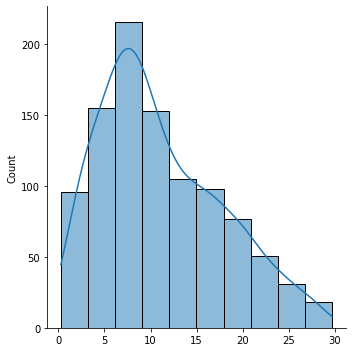

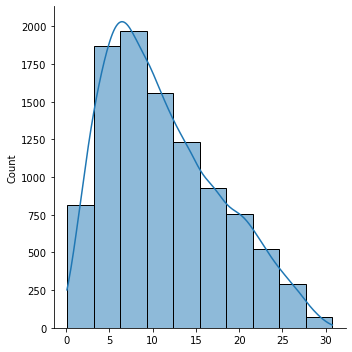

In [21]:
import seaborn as sns

sns.displot(np.sort(distance_line(100)), bins=10, kde=True)
sns.displot(np.sort(distance_line(1000)), bins=10, kde=True)
sns.displot(np.sort(distance_line(10000)), bins=10, kde=True);

<h1>Выполенение задания №3</h1>

### Part 1

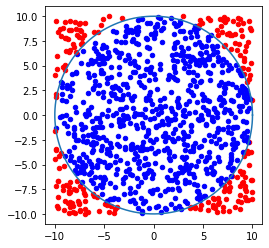

In [22]:
angle = np.linspace(0, 2 * np.pi, 150) 

radius = 10
 
x = radius * np.cos(angle) 
y = radius * np.sin(angle) 
 
figure, axes = plt.subplots(1) 
 
axes.plot(x, y) 
axes.set_aspect(1)

for i in range(1000):
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)

    if x ** 2 + y ** 2 > 100:
        plt.scatter(x, y, s=20, color='red')
    else:
        plt.scatter(x, y, s=20, color='blue')
    
plt.show() 

In [23]:
print(f'Mean for x = {np.mean(np.random.uniform(-10, 10, 1000))}')
print(f'Mean for y = {np.mean(np.random.uniform(-10, 10, 1000))}')

Mean for x = 0.1566987499117177
Mean for y = -0.2502753024587611


In [24]:
print(f'Var for x = {np.var(np.random.uniform(-10, 10, 1000))}')
print(f'Var for y = {np.var(np.random.uniform(-10, 10, 1000))}')

Var for x = 33.756247150319695
Var for y = 32.556634004639186


In [25]:
def dist(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [26]:
mainx = 20
mainy = 0

def distance_line(n):
    dists = []
    for i in range(n):
        x1, y1 = np.random.uniform(0, 10), np.random.uniform(0, 30)
        
        dists.append(dist(x1, mainx, y1, mainy))
    
    return dists

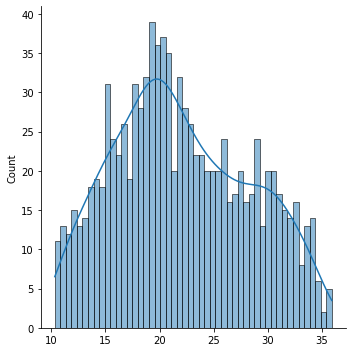

In [27]:
sns.displot(distance_line(1000), kde=True, bins=50);

In [28]:
def distance_line(n):
    dists = []
    for i in range(n):
        x1, y1 = np.random.uniform(0, 10), np.random.uniform(0, 30)
        x2, y2 = np.random.uniform(0, 10), np.random.uniform(0, 30)
        dists.append(dist(x1, x2, y1, y2))
        
    return sorted(dists)

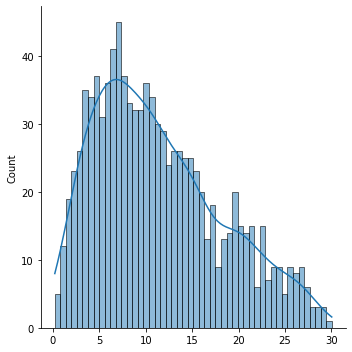

In [29]:
sns.displot(distance_line(1000), kde=True, bins=50);

<h1>Выполенение задания №4</h1>

In [30]:
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

In [31]:
guard_size = 10
poisson_lam_block=0.3
radius_block = 0.5
distance_Tx_Rx = 3
list_point = np.array

In [32]:
def plot_circle(x, y, r):
    angles = np.linspace(0, 2 * pi, 50)
    x_cir = x + r * np.cos(angles)
    y_cir = y + r * np.sin(angles)
    plt.plot(x_cir, y_cir, 'red')

In [33]:
def poisson_point_process(lambda0, area_size):
    Number_block = np.random.poisson(lambda0*area_size**2)
    x = np.random.uniform(-area_size, area_size, size=Number_block * 2)
    y = np.random.uniform(-area_size, area_size, size=Number_block * 2)
    return x, y

In [34]:
def paint_rectangle(x_point_1, y_point_1, x_point_2, y_point_2, angle):
    difference_angle = 2 * np.pi - angle
    reverse_angle = np.pi / 2 - difference_angle
    opposite_angle = reverse_angle + np.pi
    x_rectang_A = x_point_1 + radius_block * np.cos(opposite_angle)
    y_rectang_A = y_point_1 + radius_block * np.sin(opposite_angle)
    x_rectang_B = x_point_1 + radius_block * np.cos(reverse_angle)
    y_rectang_B = y_point_1 + radius_block * np.sin(reverse_angle)
    x_rectang_C = x_point_2 + radius_block * np.cos(reverse_angle)
    y_rectang_C = y_point_2 + radius_block * np.sin(reverse_angle)
    x_rectang_D = x_point_2 + radius_block * np.cos(opposite_angle)
    y_rectang_D = y_point_2 + radius_block * np.sin(opposite_angle)
    
    return x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C, y_rectang_C, x_rectang_D, y_rectang_D

In [35]:
def check_distance(A, B, C):
    CA = (C - A) / norm(C - A)
    BA = (B - A) / norm(B - A)
    CB = (C - B) / norm(C - B)
    AB = (A - B) / norm(A - B)
    
    if arccos(dot(CA, BA)) > 1:
        return norm(C - A)
    if arccos(dot(CB, AB)) > 1:
        return norm(C - B)
    return norm(cross(A - B, A - C)) / norm(B - A)

In [36]:
def crossing():
    circle_point = []
    point_1 = []
    point_2 = []
    point_1.extend([x1, y1])
    point_2.extend([x2, y2])
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
    for i in range(len(x)):
        if (np.round(check_distance(np.array(point_1), np.array(point_2), np.array(circle_point[i])), 1) <= radius_block):
            return True

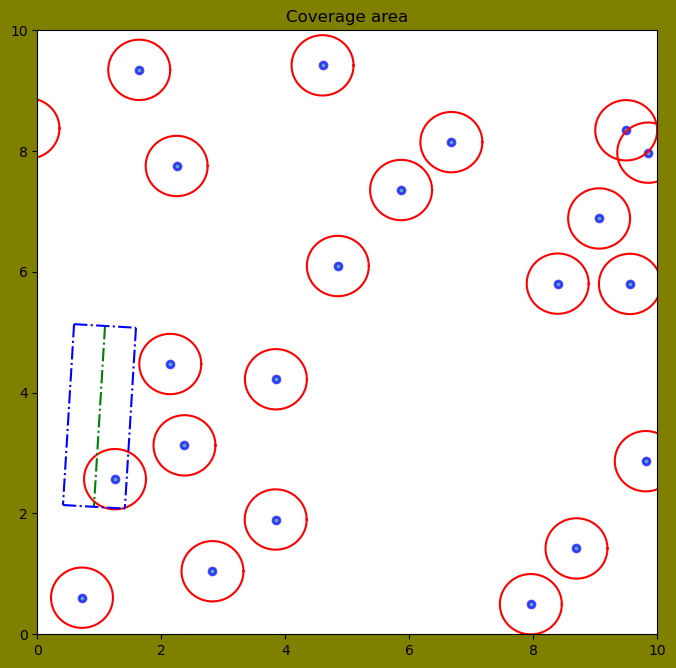

In [37]:
x, y = poisson_point_process(poisson_lam_block, guard_size)
x1, y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)
angle = np.random.uniform(0, 2 * np.pi)
x2 = x1 + distance_Tx_Rx * np.cos(angle)
y2 = y1 + distance_Tx_Rx * np.sin(angle)
x_ractang_A, y_racntang_A, x_ractang_B, y_racntang_B, x_ractang_C, y_racntang_C, x_ractang_D, y_racntang_D = paint_rectangle(x1, y1, x2, y2, angle)

plt.figure(dpi=100, figsize=(8,8), facecolor='olive')
plt.title('Coverage area')
plt.plot(x, y, '.', alpha=0.7, label='first', lw=5, mec='b', mew=2, ms=10)

for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)

plt.plot([x1, x2], [y1, y2], '-.g')

plt.plot([x_ractang_A, x_ractang_B], [y_racntang_A, y_racntang_B], '-.b')
plt.plot([x_ractang_A, x_ractang_D], [y_racntang_A, y_racntang_D], '-.b')
plt.plot([x_ractang_B, x_ractang_C], [y_racntang_B, y_racntang_C], '-.b')
plt.plot([x_ractang_D, x_ractang_C], [y_racntang_D, y_racntang_C], '-.b')
plt.xlim(0, guard_size)
plt.ylim(0, guard_size)
plt.show()

In [38]:
if crossing():
    print('Los blocked')
else:
    print('Los is not blocked')

Los blocked


In [39]:
N = 1000
summa = 0

for i in range(N):
    x, y = poisson_point_process(poisson_lam_block, guard_size)
    x1 = np.random.uniform(0, guard_size)
    y1 = np.random.uniform(0, guard_size)
    angle = np.random.uniform(0, 2 * pi)
    x2 = x1 + distance_Tx_Rx * np.cos(angle)
    y2 = y1 + distance_Tx_Rx * np.sin(angle)
    if crossing():
        summa += 1
print('Вероятность блокировки:', summa / N)

Вероятность блокировки: 0.399


In [40]:
s = 2 * radius_block * distance_Tx_Rx
lamb = poisson_lam_block * s
probability = 1 - np.exp(-lamb)
print('Blocking probability-2:', probability)

Blocking probability-2: 0.5934303402594008


<h1>Выполенение задания №5</h1>

In [41]:
def a(v1, v2):
    return np.arccos((v1 @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) * 180 / pi

In [42]:
def p_angl_1(x, y, gamma, ang_dist=5):
    x1 = x + ang_dist * np.cos(gamma)
    y1 = y + ang_dist * np.sin(gamma)
    
    return x1, y1
    
def p_angl_2(x, y, gamma, k, ang_dist=5, alfa = pi/2):
    x2 = x + ang_dist * np.cos(gamma + alfa * k)
    y2 = y + ang_dist * np.sin(gamma + alfa * k)
    
    return x2, y2

In [43]:
def crossing(x, y, x1, y1, x2, y2):
    circle_point = []
    point_1 = []
    point_2 = []
    point_1.extend([x1, y1])
    point_2.extend([x2, y2])
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
    for i in range(len(x)):
        if (np.round(check_distance(np.array(point_1), np.array(point_2), np.array(circle_point[i])), 1) <= radius_block):
            return True
    return False

In [44]:
def check_vision(vector1, vector2, v1, v2, alfa, x, y, x1, y1, x2, y2):
    if a(vector1, v1) > alfa * 180 / pi or a(vector2, v2) > alfa * 180 / pi or crossing(x, y, x1, y1, x2, y2):
        return 'Точки находятся вне области видимости'
    else:
        return 'Точки находятся в области видимости'

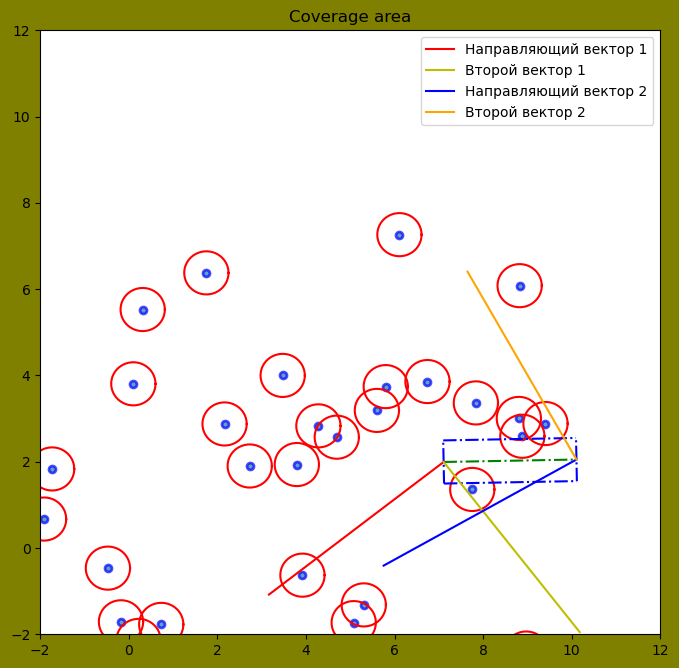

Точки находятся вне области видимости


In [45]:
x, y = poisson_point_process(poisson_lam_block, guard_size)


#  Первая точка
x1, y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)

#  Вторая точка
angle = np.random.uniform(0, 2 * np.pi)

x2 = x1 + distance_Tx_Rx * np.cos(angle)
y2 = y1 + distance_Tx_Rx * np.sin(angle)


#  Создаем прямоугольник
x_ractang_A, y_racntang_A, x_ractang_B, y_racntang_B, x_ractang_C, y_racntang_C, x_ractang_D, y_racntang_D = paint_rectangle(x1, y1, x2, y2, angle)


#  Задаем стиль и ставим точки внутри кружков
plt.figure(dpi=100, figsize=(8, 8), facecolor='olive')
plt.title('Coverage area')
plt.plot(x, y, '.', alpha=0.7, lw=5, mec='b', mew=2, ms=10)


#  Рисуем кружки
for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)


#  Чертим линию внутри прямогулоьника
plt.plot([x1, x2], [y1, y2], '-.g')


# Чертим прямоугольик

plt.plot([x_ractang_A, x_ractang_B], [y_racntang_A, y_racntang_B], '-.b')
plt.plot([x_ractang_A, x_ractang_D], [y_racntang_A, y_racntang_D], '-.b')
plt.plot([x_ractang_B, x_ractang_C], [y_racntang_B, y_racntang_C], '-.b')
plt.plot([x_ractang_D, x_ractang_C], [y_racntang_D, y_racntang_C], '-.b')



###  Чертим векторы с углом альфа 

#  Первые векторы

gamma = np.random.uniform(0, 2*pi)
alfa = pi / 2

vector1 = np.array((x1 - x2, y1 - y2))

v1_x1, v1_y1 = p_angl_1(x1, y1, gamma)

if vector1 @ np.array((p_angl_2(x1, y1, k=1, gamma=gamma))) < (vector1 @ np.array((p_angl_2(x1, y1, k=-1, gamma=gamma)))):
    v1_x2, v1_y2 = p_angl_2(x1, y1, k=1, gamma=gamma, alfa=alfa)
else:
    v1_x2, v1_y2 = p_angl_2(x1, y1, k=-1, gamma=gamma, alfa=alfa)

v1 = np.array((x1 - v1_x1, y1 - v1_y1))


#  Вторые векторы
gamma = np.random.uniform(0, 2*pi)

v2_x1, v2_y1 = p_angl_1(x2, y2, gamma)

vector2 = np.array((x2 - x1, y2 - y1))

v2 = np.array((x2 - v2_x1, y2 - v2_y1))

if vector2 @ np.array((p_angl_2(x2, y2, k=1, gamma=gamma))) < vector2 @ np.array((p_angl_2(x2, y2, k=-1, gamma=gamma))):
    v2_x2, v2_y2 = p_angl_2(x2, y2, k=1, gamma=gamma, alfa=alfa)
else:
    v2_x2, v2_y2 = p_angl_2(x2, y2, k=-1, gamma=gamma, alfa=alfa)

    
    
# Рисуем векторы    

plt.plot([x1, v1_x1], [y1, v1_y1], 'r', label='Направляющий вектор 1')
plt.plot([x1, v1_x2], [y1, v1_y2], 'y', label='Второй вектор 1')


plt.plot([x2, v2_x1], [y2, v2_y1], 'b', label='Направляющий вектор 2')
plt.plot([x2, v2_x2], [y2, v2_y2], 'orange', label='Второй вектор 2')



plt.xlim(-2, 12)
plt.ylim(-2, 12)
plt.legend()

plt.show()

print(check_vision(vector1, vector2, v1, v2, alfa, x, y, x1, y1, x2, y2))

Точки находятся вне области видимости


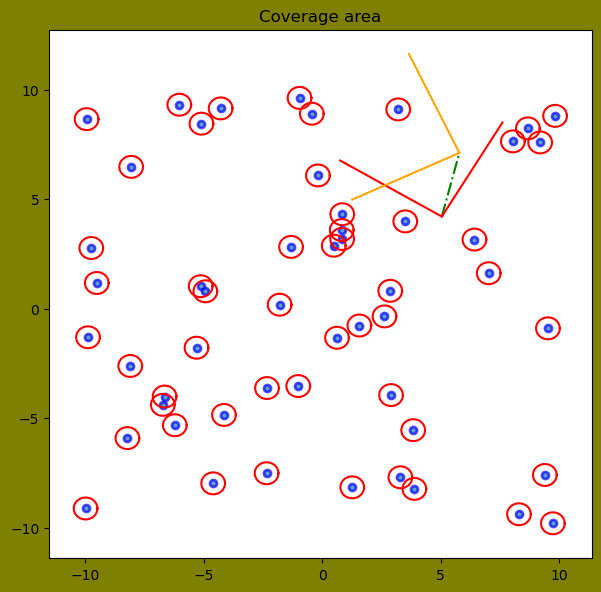

In [46]:
x, y = poisson_point_process(poisson_lam_block, 10)


#  Первая точка
x1, y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)

#  Вторая точка
angle = np.random.uniform(0, 2 * np.pi)

x2 = x1 + distance_Tx_Rx * np.cos(angle)
y2 = y1 + distance_Tx_Rx * np.sin(angle)


plt.figure(dpi=100, figsize=(7, 7), facecolor='olive')
plt.title('Coverage area')
plt.plot(x, y, '.', alpha=0.7, lw=5, mec='b', mew=2, ms=10)

#  Чертим линию внутри прямогулоьника
plt.plot([x1, x2], [y1, y2], '-.g')


for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)

#  Первые векторы

gamma = np.random.uniform(0, 2*pi)
alfa = pi / 2

vector1 = np.array((x1 - x2, y1 - y2))

v1_x1, v1_y1 = p_angl_1(x1, y1, gamma)

if vector1 @ np.array((p_angl_2(x1, y1, k=1, gamma=gamma))) < (vector1 @ np.array((p_angl_2(x1, y1, k=-1, gamma=gamma)))):
    v1_x2, v1_y2 = p_angl_2(x1, y1, k=1, gamma=gamma, alfa=alfa)
else:
    v1_x2, v1_y2 = p_angl_2(x1, y1, k=-1, gamma=gamma, alfa=alfa)

v1 = np.array((x1 - v1_x1, y1 - v1_y1))


#  Вторые векторы
gamma = np.random.uniform(0, 2*pi)

v2_x1, v2_y1 = p_angl_1(x2, y2, gamma)

vector2 = np.array((x2 - x1, y2 - y1))

v2 = np.array((x2 - v2_x1, y2 - v2_y1))

if vector2 @ np.array((p_angl_2(x2, y2, k=1, gamma=gamma))) < vector2 @ np.array((p_angl_2(x2, y2, k=-1, gamma=gamma))):
    v2_x2, v2_y2 = p_angl_2(x2, y2, k=1, gamma=gamma, alfa=alfa)
else:
    v2_x2, v2_y2 = p_angl_2(x2, y2, k=-1, gamma=gamma, alfa=alfa)

# Рисуем векторы    

plt.plot([x1, v1_x1], [y1, v1_y1], 'r')
plt.plot([x1, v1_x2], [y1, v1_y2], 'r')


plt.plot([x2, v2_x1], [y2, v2_y1], 'orange')
plt.plot([x2, v2_x2], [y2, v2_y2], 'orange')



print(check_vision(vector1, vector2, v1, v2, alfa, x, y, x1, y1, x2, y2))

In [47]:
def make_thing():
    x, y = poisson_point_process(poisson_lam_block, guard_size)


    #  Первая точка
    x1, y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)

    #  Вторая точка
    angle = np.random.uniform(0, 2 * np.pi)

    x2 = x1 + distance_Tx_Rx * np.cos(angle)
    y2 = y1 + distance_Tx_Rx * np.sin(angle)


    #  Первые векторы

    gamma = np.random.uniform(0, 2*pi)
    alfa = pi / 2

    vector1 = np.array((x1 - x2, y1 - y2))

    v1_x1, v1_y1 = p_angl_1(x1, y1, gamma)

    if vector1 @ np.array((p_angl_2(x1, y1, k=1, gamma=gamma))) < (vector1 @ np.array((p_angl_2(x1, y1, k=-1, gamma=gamma)))):
        v1_x2, v1_y2 = p_angl_2(x1, y1, k=1, gamma=gamma, alfa=alfa)
    else:
        v1_x2, v1_y2 = p_angl_2(x1, y1, k=-1, gamma=gamma, alfa=alfa)

    v1 = np.array((x1 - v1_x1, y1 - v1_y1))


    #  Вторые векторы
    gamma = np.random.uniform(0, 2*pi)

    v2_x1, v2_y1 = p_angl_1(x2, y2, gamma)

    vector2 = np.array((x2 - x1, y2 - y1))

    v2 = np.array((x2 - v2_x1, y2 - v2_y1))

    if vector2 @ np.array((p_angl_2(x2, y2, k=1, gamma=gamma))) < vector2 @ np.array((p_angl_2(x2, y2, k=-1, gamma=gamma))):
        v2_x2, v2_y2 = p_angl_2(x2, y2, k=1, gamma=gamma, alfa=alfa)
    else:
        v2_x2, v2_y2 = p_angl_2(x2, y2, k=-1, gamma=gamma, alfa=alfa)
    
    return(check_vision(vector1, vector2, v1, v2, alfa, x, y, x1, y1, x2, y2))
    
print(make_thing())

Точки находятся в области видимости


In [48]:
n = 1000
s = 0

for i in range(n):
    if make_thing() == 'Точки находятся в области видимости':
        s += 1
    
print(s / n)

0.153


In [49]:
def math_model(alfa):
    return alfa ** 2 / (4 * pi ** 2)

In [50]:
print(math_model(pi/2))

0.0625


<h1>Выполнение задания №6</h1>

In [51]:
def make_circle():
    angle = np.linspace(0, 2 * np.pi, 150) 

    radius = 10

    x1_big_cir = radius * np.cos(angle) 
    y1_big_cir = radius * np.sin(angle) 

#     plt.plot(x1_big_cir, y1_big_cir, 'b') 

In [52]:
def poisson_point_process(lambda0, area_size=10):
    Number_block = np.random.poisson(lambda0*area_size**2)
    x = np.random.uniform(-area_size, area_size, size=Number_block * 2)
    y = np.random.uniform(-area_size, area_size, size=Number_block * 2)
    return x, y

In [53]:
def make_points(n_block=1):
    x_cir, y_cir = poisson_point_process(n_block, 10)

    angle = np.random.uniform(0, 2 * np.pi)
    
#     plt.plot(x_cir, y_cir, '.', alpha=0.7, lw=5, mec='b', mew=2, ms=10)
    
    return x_cir, y_cir

In [54]:
def check_vision(vector1, v1, alfa, x, y, x1, y1, x2=0, y2=0):
    if a(vector1, v1) > alfa * 180 / pi or crossing(x, y, x1, y1, x2, y2):
        return 'Точки находятся вне области видимости'
    else:
        return 'Точки находятся в области видимости'

In [55]:
def make_priem(alfa = pi / 2):
    gamma = np.random.uniform(0, 2*pi)
    
    x1, y1 = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
    while x1 ** 2 + y1 ** 2 > 100:
        x1, y1 = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
        
    vector1 = np.array((x1, y1))

    v_x1, v_y1 = p_angl_1(x1, y1, gamma)
    
    v1 = np.array((x1 - v_x1, y1 - v_y1))
    
    if vector1 @ np.array((p_angl_2(x1, y1, k=1, gamma=gamma))) < (vector1 @ np.array((p_angl_2(x1, y1, k=-1, gamma=gamma)))):
        v_x2, v_y2 = p_angl_2(x1, y1, k=1, gamma=gamma, alfa=alfa)
    else:
        v_x2, v_y2 = p_angl_2(x1, y1, k=-1, gamma=gamma, alfa=alfa)
    
#     plt.plot([x1, v_x1], [y1, v_y1], 'r')
#     plt.plot([x1, v_x2], [y1, v_y2], 'r')
    
    return vector1, v1, alfa, x1, y1

In [56]:
x_cir, y_cir= make_points()
      
n = 70
s = 0
for i in range(n):
    vector1, v1, alfa, x1, y1 = make_priem()
    s += 'Точки находятся в области видимости' == check_vision(vector1, v1, alfa, x_cir, y_cir, x1, y1, x2=0, y2=0)

print(s / n)

0.0


In [57]:
x_cir, y_cir= make_points(8)
gamma = np.linspace(0, pi, 10)
result = []
n = 10
for i, angle in enumerate(gamma):
    s = 0
    for i in range(n):
        
        vector1, v1, alfa, x1, y1 = make_priem()
        s += 'Точки находятся в области видимости' == check_vision(vector1, v1, alfa, x_cir, y_cir, x1, y1, x2=0, y2=0)
    result.append(s / n)
result

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

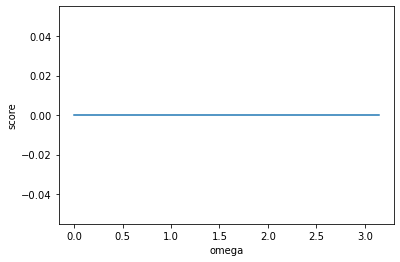

In [58]:
plt.plot(gamma, result)
plt.xlabel('omega')
plt.ylabel('score')
plt.show()

In [59]:
n_block = np.linspace(0, 2, 20)

result = []
n = 10
for i, block in enumerate(n_block):
    s = 0
    for i in range(n):
        x_cir, y_cir= make_points(block)
        vector1, v1, alfa, x1, y1 = make_priem()
        s += 'Точки находятся в области видимости' == check_vision(vector1, v1, alfa, x_cir, y_cir, x1, y1, x2=0, y2=0)
    result.append(s / n)

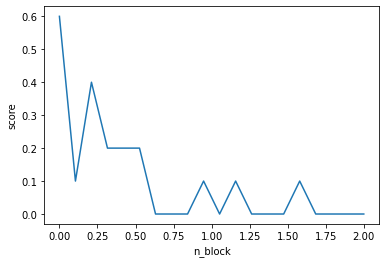

In [60]:
plt.plot(n_block, result)
plt.xlabel('n_block')
plt.ylabel('score')
plt.show()

In [61]:
result = []
priems = np.linspace(1, 25, 25)
for j, p in enumerate(priems):
    s = 0
    for i in range(int(p)):
        x_cir, y_cir= make_points(0.35)
        vector1, v1, alfa, x1, y1 = make_priem()
        s += 'Точки находятся в области видимости' == check_vision(vector1, v1, alfa, x_cir, y_cir, x1, y1, x2=0, y2=0)
    result.append(s / p)

In [62]:
len(result)

25

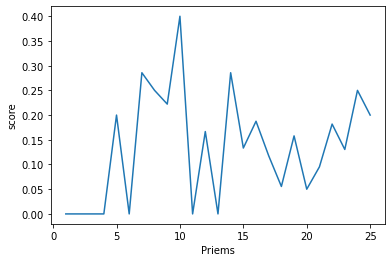

In [63]:
plt.plot(priems, result)
plt.xlabel('Priems')
plt.ylabel('score')
plt.show()